# Train an Image-Classifier using Federated Learning with Differential Privacy
## A complete End-to-End Real World Example - PySyft, PyGrid
* This tutorial aims at demonstrating a high level of privacy using **Secured Federated Learning** and **Differential Privacy based on the Laplace-Mechanism** as part of the **PATE framework**. To tackle a problem similair to a real-world-problem, yet still using a well explored example (the privacy tools are of main interest in this tutorial) it was chosen to train an Image-Classifier on the **[Cifar-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)**. In the [original paper on the PATE framework](https://arxiv.org/pdf/1610.05755.pdf), simpler problems such as training a classifier on MNIST and SVHN were tackled.
* Containing 60000 32x32 pixels coloured images of 10 different classes (airplanes, birds, etc.) this should showcase a reasonably similair task to another real-world example such as the training of a classifier for skin-cancer-classification, which heavily relies on sensitive private data. See [Stanford's Skin Cancer Classification with Deep Learning](https://cs.stanford.edu/people/esteva/nature/) for more information on this specific example.
* To be able to give a complete end-to-end example after having performed the example using `PySyft.VirtualWorkers` we'll be using a Public/Private Grid and actual workers using the PyGrid work.  

### Specific Situation - Real-World-Scenario: 
To make the example as real as possible and to best give a quick overview over the PATE framework for DP along with FL, we define  three different parties taking part in this setup. 
  1. **Data Provider:** Owns personal data, in this case some photographers who all made pictures of some objects in real life and sorted them (into the ten classes for this examle). His/her goal is to either *create/train a classifier* which automates the sorting of the images for him/her or to *participate in creating a general image classifier which can recognize objects on images in general*. Possibly he also wants somebody to *host the classifier to speed up inference time*. 
  2. **Model Provider:** Creates the model, in this case the classifier-model. His/her goal is to use his model-architecture and train it on the photographers (Data Provider) personal data and to then make this trained model available to a broad range of user. 
  3. **Hosting Provider:** Provides computing ressources along possible hosting capabilities. His/her goal is to provide the Data and Model Provider with the neccessary computing power for training and hosting capabilities for deployment. 
  * **How is this example representative for the need/usage of privacy preserving ML?**
    This example portrays some of the key characteristics of privacy-preserving ML. 
      * **Combining Knowledge:** A single photographer wouldn't provide enough data to train a good image classifier and wouldn't have the knowledge to build a classifier. Together with different other (possibly even competing photographers) and a model provider he can train a good model together with the other parties. 
      * **Federated Learning:** He doesn't want his sorted photographs to be accessable by either the other competing photographers or the model creator. (He wants to sell his photographs)
      * **Differential Privacy:** Classifiers as ML-Models in general can memorize specific parts of the training data, making it possible to retrieve information about the training data (or even parts of some datapoints). In this case the photographer doesn't want users of the classifier (e.g.: the competing photographers) to be able to retrieve information about his unique way of photograhping (e.g.: key motives, etc.)  
      * All the above points are also exactly the critical points when trainng a classifier e.g. on a skin-cancer dataset.

### The PP-techniques that will be used here:
* **FL** - Federated Learning: We will be using **SMPC-Encrypted Federated Learning** *(For a quick overview see below)*
* **DP** - Differential Privacy: We will be using the **Laplace-Mechanism** as part of the secure aggregation in the PATE procedure *(More information below)*


### The PP-tools that will be used here:
* **PySyft**
  * Plans 
  * Protocolls
  * VirtualWorkers
* **PyGrid** 
  * Gateway
  * GridNode
  
**TODO: CHECK SPECIFIC TYPES AND IN WHICH LIBRARIES THEY ARE! (Apparently currently changing)**

Author:
- Nicolas Remerscheid - GitHub: [@NiWaRe](https://github.com/NiWaRe)

References: 
- References of different authors 
  *This example/usecase is heavily based in previous tutorials on PySyft and PyGrid from ......*
 
***TODO: LINK SPECIFIC LEARNING MATERIALS AS PREREQUESITS AND SPECIFIC AUTHORS.***

# The PATE Framework
## The assumptions 
Introduced in [this paper](https://arxiv.org/pdf/1610.05755.pdf) the *Private Aggregation of Teacher
Ensembles* (PATE) framework consists of the following basic setup. 
It is important to note that the PATE framework assumes a certain situation: 
* **Discrete Model Output:** The PATE framework (acoording to the original paper) assumes that a model should be trained that has a discrete output i.e. it categorizes or classifies some input into categories. In this case this is an image-classifier. 
* **Data structure:** The PATE framework assumes that the following data exists and is stored in the following way:
  * **Private Data:** The private data is stored on multiple workers (photographers here) The private data is *labeled* and each worker has *different datapoints* (different photographs). Furthermore the private data isn't sufficient to train a good classifier alone.  
  * **Public Data:** In addition to the private data PATE assumes that there exists a second larger dataset of *unlabeled, public and unsensitive* images. In this case for example this could be very large database of pictures from various newspapers. They aren't labeled and everybody can access them since the newspapers decided to share them, as they don't sell them directly. 
* **Semi-Supervised Learning:** Given the particular datasets that are given PATE assumes that we want to leverage smaller labeled datasets (normally used for supervised learning) together with an unlabeled dataset (normally used for unsupervised learning) to train a final model, meaning we want to train it using semi-supervised learning. 


## The procedure
(For more info see in the learning material section above, notably Andrew Trask's tutorial) <br>
This image shows an overview over the procedure: 
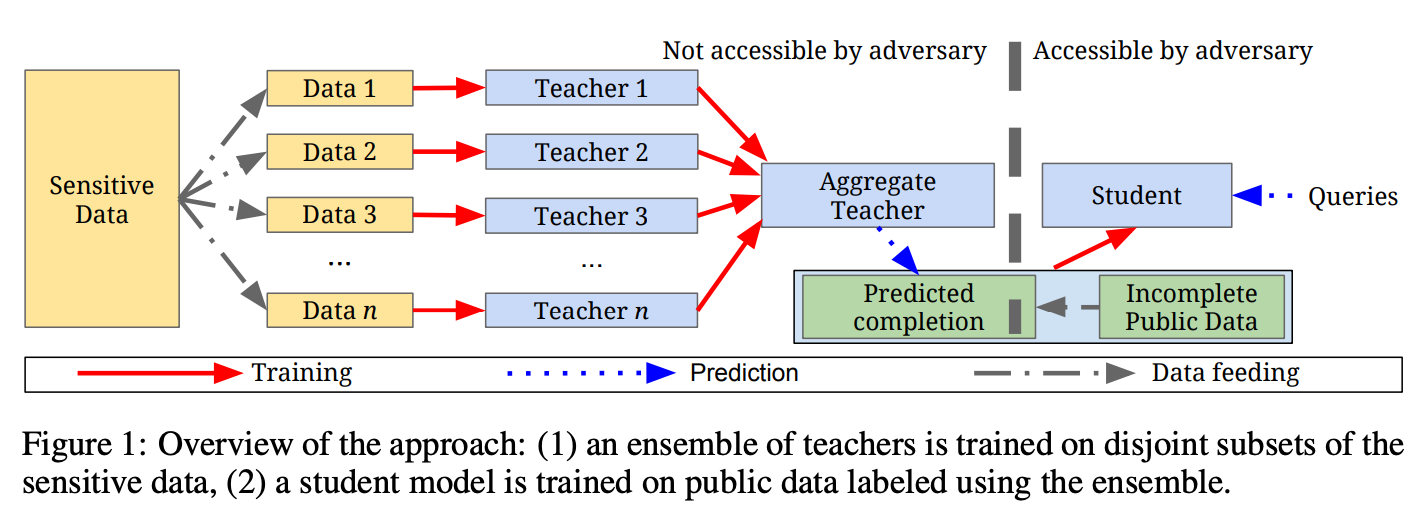

1. STEP: **Multiple Teacher-Models are trained on each of the private datasets**
  * This is also where we want to use **Federated Learning** to not *directly* access the data at all. To make sure that the photographers don't see the model of the model provider (he/she sells that) we'll be encrypting both the model and the data via Additive Secret Sharing using Secure Multi-Party Computing (SMPC). *Overview on that later.*
2. STEP: **For each unlabeled datapoint in the public dataset teacher-models jointly predict a label**
  * This is where noise is added for **Differential Privacy**. 
3. STEP: **One Student-Model is trained on the newly labeled public dataset**
  * This is where **the final model** is created. 

# Setting Up and Testing without Grid
First we want to implement the procedure in raw form and as an automated protocoll and test it with a simple infrastructure using `PySyft.VirtualWorkers()` to then later deploy it to an actual grid-infrastructure whith actual workers. 

## Setting up the test-infrastructure 
We will beginn with VirtualWorkers and no grid to test the different other components and protocolls (FL, PATE). 

In [ ]:
# TODO: Beginning with standard setup , Setup workers, etc. 

## PATE Step 1: Traning Teacher Models 
Here FL learning will be done. 


In [ ]:
# TODO: Implement SMPC-FL to train teacher models 
#       (Possibly first test in raw form, then implemented as Plan/Part of Protocoll)

In [ ]:
# TODO: for protocolls check again how the pate-framework is already implemented in PySyft

## PATE Step 2: Label Public Dataset with aggregated teacher-predictions
Here DP aggregation will be done.

In [ ]:
# TODO: Implement DP-secure aggregation of teacher predictions on public dataset 

## PATE Step 3: Train Student Model
Here Student Model will be trained 

In [ ]:
# TODO: Implement training of student model 

## Testing of PATE Procedure 
Here using the testing infrastructure the PATE procedure will be tested. <br>
The goal is to implement the PATE procedure as a `PySyft.protocoll` using `PySyft.plans` which also should be tested as a general automated procedure before deploying everything on actual workers and a grid. 

In [ ]:
# TODO: Do testing of complete procedure

# The final project on the grid
Here the final real end-to-end example of photographers training a image-classfier together with a model provider should be showcased using an actual grid, whith a gateway and workers which could actually run on remote machines. 

In [ ]:
# TODO: Setting up a grid with workers + documentation + further links to grid tutorials 

# Performance Evaluation 
* **Performance Evaluation:** *Depending on time can be extended or not*
  Analyse Performance of Decentralized Training with normal Training, Possible metrics: 
    * Training Time: Convergence Speed, Compuation Time (incl. communication, etc.)
    * Model-Performance: Relevant Metrics (Accuracy, etc.)
    * Privacy-Leakage-Anlysis in different security situations (active and passive security)
    * Model-Robustness: Impact of decentralized 
    * Model-Fairness: Impact of decentralized 